# **TAXI COMPANY PROJECT**
**Milestone 5 - Regression Assumptions After Modeling**

I'm having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.
Now it’s time to work on predicting the taxi fare amounts by building the regression model.
A notebook was structured and prepared to help me in this project. It includes questions that will me preparing the executive summary of this project milestone.

In this activity, I will build a multiple linear regression model, in order to estimate the linear relationship between one continuous dependent variable and two or more independent variables.

**The goal** is to build a multiple linear regression model and evaluate the model

*I divided this activity in three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results
* What key insights emerged from your model(s)?
* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

### Task 1. Imports and loading
Let's import the packages that are needed for building linear regression models.

In [1193]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [1194]:
df0=pd.read_csv("Taxi_Trip_Data.csv")

## **Preparation**

1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, I should make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help me decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset I can create a `duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.

### Task 2a. Explore data with EDA

First, let's analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [1197]:
# Start with `.shape` and `.info()`

# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [1198]:
# Check for missing data and duplicates

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

There are no duplicates or missing values in the data.

In [1200]:
# Display descriptive stats about the data
df.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like `tip_amount` (max $200) and `total_amount` (max $1,200). Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

### Task 2b. Convert pickup & dropoff columns to datetime

In [1203]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [1204]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='mixed')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='mixed')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:00   2017-04-11 15:19:00   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75

### Task 2c. Create duration column

Next, I'll create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [1207]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Outliers
By calling `df.info()` function I'll inspect the columns and decide which ones to check for outliers.

In [1209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit the model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`

### Task 2d. Box plots

Let's plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

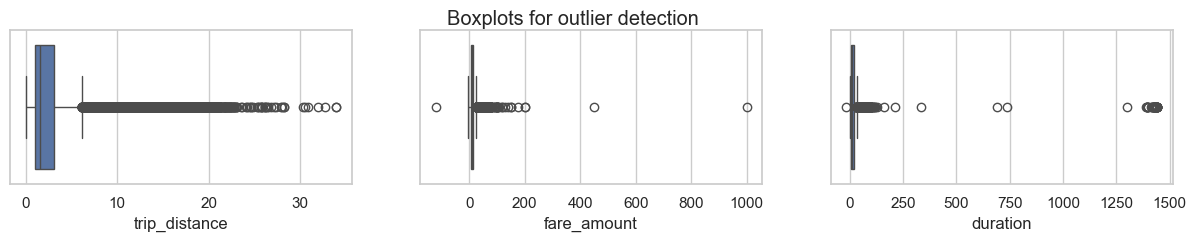

In [1212]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

All three variables contain outliers. Some are extreme, but others not so much.

It's 30 miles from the southern end to the northern end of the city, and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

Probably not for the latter two, but for `trip_distance` it might be okay.

### Task 2e. Imputations

#### `trip_distance` outliers

From the summary statistics it was revealed that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, I'll sort the column values, eliminate duplicates, and inspect the least 10 values.

In [1216]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

To answe this question, I'll calculate the count of rides where the `trip_distance` is zero.

In [1218]:
sum(df['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. I could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

#### `fare_amount` outliers

In [1221]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly $1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is $8. The standard formula of `Q3 + (1.5 * IQR)` yields $26.50. That doesn't seem appropriate for the maximum fare cap. In this case, I'll use a factor of `6`, which results in a cap of $62.50.

Therefore, I'll impute values less than $0 with `0`.

In [1223]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Next, I'll impute the maximum value as `Q3 + (6 * IQR)` by using custom function 'outlier_imputer'

In [1225]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [1226]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers

In [1228]:
df['duration'].describe()

count    22699.000000
mean        17.010830
std         61.996458
min        -17.000000
25%          6.750000
50%         11.000000
75%         18.258333
max       1440.000000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Thus, I'll impute all negative durations with `0`.

* **High values:** I should impute high values the same way I imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [1230]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [1231]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.258333333333333
upper_threshold: 87.30833333333334
count    22699.000000
mean        14.452878
std         11.922529
min          0.000000
25%          6.750000
50%         11.000000
75%         18.258333
max         87.308333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, I'll create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

I'll begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

In [1234]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

Next, I'll use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. At the end, I'll assign the results to a variable named `grouped`.

In [1236]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

trip_distance
pickup_dropoff               
1 1                  2.433333
10 148              15.700000
100 1               16.890000
100 100              0.253333
100 107              1.180000

Next, I'll convert the 'grouped' dataframe to a dictionary, and assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances - this is the information I want.

In [1238]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

Now, I'll create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

In [1240]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

mean_distance
0           3.521667
4909        3.521667
16636       3.521667
18134       3.521667
19761       3.521667
20581       3.521667

#### Create `mean_duration` column

Let's repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [1242]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

mean_duration
0          22.883333
4909       22.883333
16636      22.883333
18134      22.883333
19761      22.883333
20581      22.883333

#### Create `day` and `month` columns

Next, I'll create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [1244]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


#### Create `rush_hour` column

I'll define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00-10:00 or from 16:00-20:00

For that purpose, I'll create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [1246]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [1247]:
df['rush_hour'] = np.where(((df['rush_hour'] >= 6) & (df['rush_hour'] < 10)) | ((df['rush_hour'] >= 16) & (df['rush_hour'] < 20)), 1, 0)

df['rush_hour'].value_counts()

rush_hour
0    15963
1     6736
Name: count, dtype: int64

### Task 4. Scatter plot

Let's create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

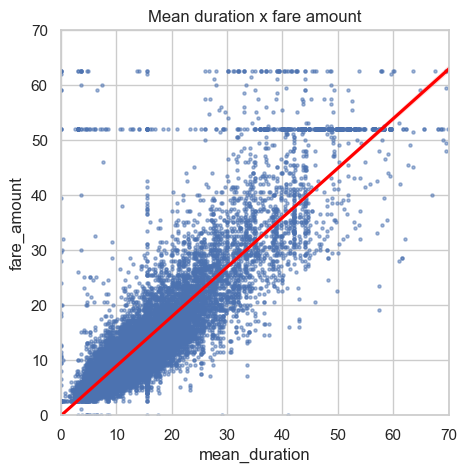

In [1249]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

I know what 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

Let's check the value of the rides in the second horizontal line in the scatter plot.

In [1251]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

There are 514 trips whose fares were $52.

The data dictionary says that `RatecodeID` of 2 indicates trips for the International Airport.

Therefore, the values for this rate code can be dropped before training the model, because those values don't add predictive power to the model.
Before dropping them, In order to prepare the categorical variables for modeling, I should first Dummy encode the 'VendorID' variable.


In [1254]:
# Dummy encode the 'VendorID' column
df['VendorID_2'] = (df['VendorID'] == 2).astype(int)
print(df.shape)
df.head()

(22699, 26)


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:00   2017-04-11 15:19:00   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:00   2017-05-07 13:48:00   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount   duration  \
0        2.76           0.0                    0.3         16.56  14.066667   
1        4.00           0.0                    0.3         20.80  26.000000   
2        1.45           0.0                    0.3          8.75   7.200000   
3        6.39           0.0                    0.3         27.69  31.000000   
4        0.00           0.0                    0.3         17.80  16.716667   

  pickup_dropoff  mean_distance  mean_duration       day month  rush_hour  \
0        100 231       3.521667      22.883333  saturday   mar          0   
1         186 43       3.108889      24.288889   tuesday   apr          0   
2        262 236       0.881429       7.258571    friday   dec          1   
3         188 97       3.700000      31.000000    sunday   may          0   
4          4 112       4.435000      14.358333  saturday   apr          0   

   VendorID_2  
0           1  
1           0  
2           0  
3           1  
4           1

Next, I'll filter the dataframe 'df' to contain only records with 'RateCodeID' <> 2, and name it as 'df_no52'. The purpose of this is to drop records without predictive power to the model.

In [1256]:
df_no52 = df[df['fare_amount'] != 52]

### Task 5. Isolate modeling variables

Next, I'll drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [1258]:
df_no52.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22185 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22185 non-null  int64         
 1   VendorID               22185 non-null  int64         
 2   tpep_pickup_datetime   22185 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22185 non-null  datetime64[ns]
 4   passenger_count        22185 non-null  int64         
 5   trip_distance          22185 non-null  float64       
 6   RatecodeID             22185 non-null  int64         
 7   store_and_fwd_flag     22185 non-null  object        
 8   PULocationID           22185 non-null  int64         
 9   DOLocationID           22185 non-null  int64         
 10  payment_type           22185 non-null  int64         
 11  fare_amount            22185 non-null  float64       
 12  extra                  22185 non-null  float64       
 13  mta_ta

Next, let's prepare the dataframe for modeling by dropping unpredictive columns.

In [1260]:
df2 = df_no52.copy()

df2 = df2.drop(['Unnamed: 0', 'VendorID', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22185 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22185 non-null  int64  
 1   fare_amount      22185 non-null  float64
 2   mean_distance    22185 non-null  float64
 3   mean_duration    22185 non-null  float64
 4   rush_hour        22185 non-null  int32  
 5   VendorID_2       22185 non-null  int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 1.0 MB


### Task 6. Pair plot

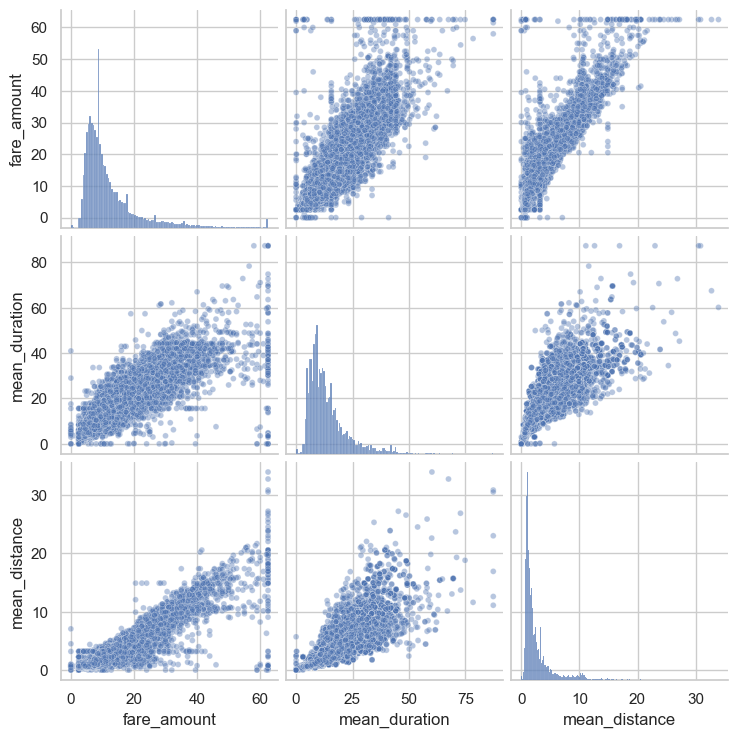

In [1262]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

All these variables show linear correlation with each other. Therefore, I should investigate this further.

### Task 7. Identify correlations

Next, I'll code a correlation matrix to help me determine most correlated variables.

In [1266]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

passenger_count  fare_amount  mean_distance  mean_duration  \
passenger_count         1.000000     0.012916       0.012102       0.013376   
fare_amount             0.012916     1.000000       0.904080       0.848236   
mean_distance           0.012102     0.904080       1.000000       0.847657   
mean_duration           0.013376     0.848236       0.847657       1.000000   
rush_hour              -0.023232    -0.027514      -0.055559      -0.031407   
VendorID_2              0.267529    -0.004120       0.000500      -0.002503   

                 rush_hour  VendorID_2  
passenger_count  -0.023232    0.267529  
fare_amount      -0.027514   -0.004120  
mean_distance    -0.055559    0.000500  
mean_duration    -0.031407   -0.002503  
rush_hour         1.000000   -0.002877  
VendorID_2       -0.002877    1.000000

And I'll visualize a correlation heatmap of the data.

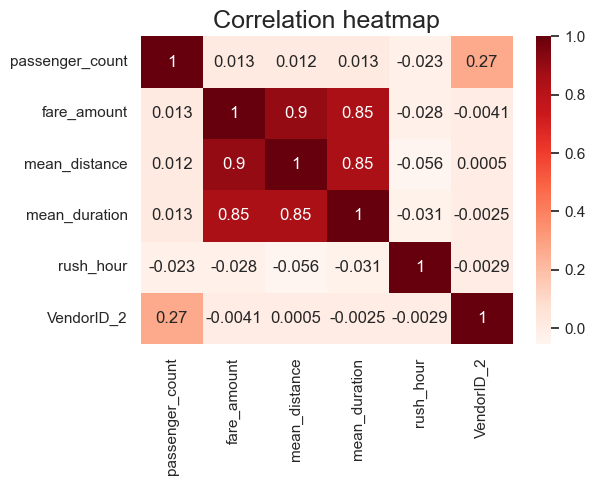

In [1268]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` with a Pearson correlation of 0.85. They're also both highly correlated with each other, with the same Pearson correlation of 0.85. 

Highly correlated predictor variables can be bad for linear regression models when I want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

The model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, I'll try modeling with both variables even though they are correlated.

### Task 8a. Split data into outcome variable and features

In [1271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22185 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22185 non-null  int64  
 1   fare_amount      22185 non-null  float64
 2   mean_distance    22185 non-null  float64
 3   mean_duration    22185 non-null  float64
 4   rush_hour        22185 non-null  int32  
 5   VendorID_2       22185 non-null  int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 1.0 MB


To begin with the model, first I'll set the X and y variables. X represents the features and y represents the outcome (target) variable.

In [1273]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])
print(X.shape)
# Set y variable
y = df2[['fare_amount']]
print(y.shape)
# Display first few rows
X.head()

(22185, 5)
(22185, 1)


passenger_count  mean_distance  mean_duration  rush_hour  VendorID_2
0                6       3.521667      22.883333          0           1
1                1       3.108889      24.288889          0           0
2                1       0.881429       7.258571          1           0
3                1       3.700000      31.000000          0           1
4                1       4.435000      14.358333          0           1

### Split data into training and test sets

In the next step of the modeling, I'll create training and testing sets. The test set should contain 20% of the total samples.

In [1276]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Next, I should standardize the `X_train` variables. I'assign the results to a variable called `X_train_scaled`.

In [1278]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)
print(X_train_scaled.shape)

X_train scaled: [[-0.49805271  0.20815802  0.20786386 -0.65514552 -1.11969384]
 [-0.49805271  0.00544405 -0.21627122 -0.65514552 -1.11969384]
 [-0.49805271 -0.63258971 -1.04932333 -0.65514552 -1.11969384]
 ...
 [-0.49805271 -0.56756004 -0.14283263 -0.65514552 -1.11969384]
 [-0.49805271 -0.49366252 -0.31240111 -0.65514552  0.89310128]
 [-0.49805271  2.31214403  0.83916802 -0.65514552 -1.11969384]]
(17748, 5)


### Fit the model

Next, I'll instantiate the model and fit it to the training data.

In [1280]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Task 8b. Evaluate model

### Train data

During the training phase, I should evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Also, I'll calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [1283]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8497634009069827
R^2: 0.8497634009069827
MAE: 1.9674490936445925
MSE: 11.652026725764971
RMSE: 3.413506514680318


### Test data

Let's calculate the same metrics on the test data. I also need to scale the `X_test` data using the scaler that was fit to the training data. I don't need to refit the scaler to the testing data, but I'll just transform it. The results will be saved in `X_test_scaled` variable.

In [1285]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [1286]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8082492110006176
R^2: 0.8082492110006176
MAE: 2.0609302409605412
MSE: 14.758554823693139
RMSE: 3.841686455671928


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R^2 of 0.808 means that 80.8% of the variance in the `fare_amount` variable is described by the model.

### Task 9a. Results

Next, let's get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [1289]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
6790      5.5   7.344893 -1.844893
12609     6.0   5.598965  0.401035
7589     25.0  23.775211  1.224789
10789     5.0   6.329857 -1.329857
158      23.0  23.322917 -0.322917

### Task 9b. Visualize model results

In order to visualize model results, I'll create a scatterplot `actual` vs. `predicted`.

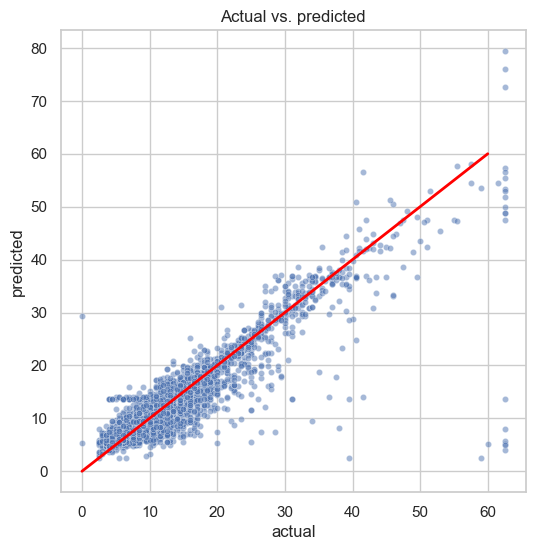

In [1292]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Further, I'll also visualize the distribution of the `residuals` using a histogram.

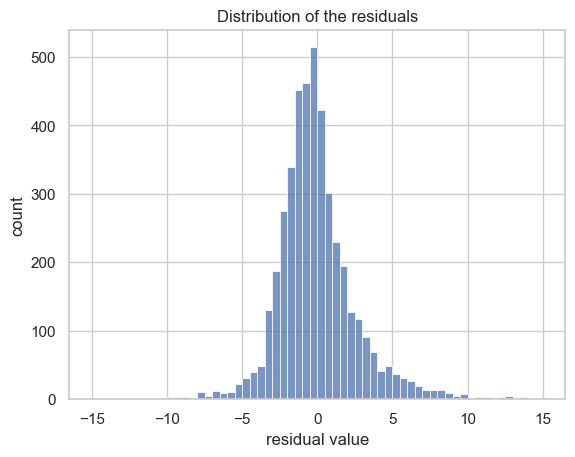

In [1294]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [1295]:
results['residual'].mean()

0.10918303600365285

The distribution of the residuals is approximately normal and has a mean of 0.109. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Now, let's create a scatterplot of `residuals` over `predicted`.

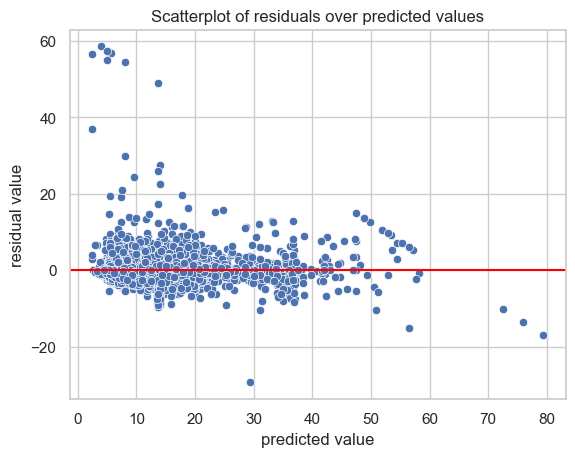

In [1298]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which I know are the imputed maximum of $62.50.

### Task 9c. Coefficients

In order to get the model's coefficients, I'll use the `coef_` attribute. The coefficients are output in the order of the features that were used to train the model.

In [1301]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

passenger_count  mean_distance  mean_duration  rush_hour  VendorID_2
0         0.025347       5.860886       2.540507   0.183309   -0.013915

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Because the data used to train the model was first standardized, the units are no longer miles. That's why the correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of ~$5.86. 

So, I should translate this back to miles instead of standard deviation (i.e., unscale the data). 
For that purpose, first I'll calculate the standard deviation of `mean_distance` in the `X_train` data, and after I'll divide the coefficient (5.860886) by the result to yield a more intuitive interpretation.

In [1303]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(5.860886 / X_train['mean_distance'].std())

2.819402877387607
2.0787685389008894


Now I can make a more intuitive interpretation: for every 2.82 miles traveled, the fare increased by a mean of ~$5.86. Or, reduced: for every 1 mile traveled, the fare increased by a mean of ~$2.08.

### Task 9d. Conclusion
I can discuss meeting linear regression assumptions, and present the MAE and RMSE scores obtained from the model.

More work must be done to prepare the predictions to be used as inputs into the model for the upcoming project milestone. This work will be broken into the following steps:

1. Define X and y on the full dataset.
   
2. Impute the constant fare rate of $52 for all trips with rate codes of `2`.
   
3. Get the model's predictions on the full dataset.

4. Check the model's performance on the full dataset.

5. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.


### 1. Define X and y on the full dataset

In [1359]:
X = df.drop(['Unnamed: 0', 'VendorID', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month', 'fare_amount'], axis=1)
y = df['fare_amount']


### 2. Impute the constant fare rate of $52 for all trips with rate codes of `2`

In [1363]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

#Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

RatecodeID  y_preds_full
11            2          52.0
110           2          52.0
161           2          52.0
247           2          52.0
379           2          52.0

### 3. Get the model's predictions on the full dataset.

In [1369]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

### 4. Check the model's performance on the full dataset

In [1371]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8920359817136627
MAE: 1.941325315703251
MSE: 11.995955487246222
RMSE: 3.463517790808389


After testing the model on the full dataset, the R^2 score was significantly better than after training (0.89 compared to 0.808).
Finally, I can say that 89% of the variance in the `fare_amount` variable is described by this model.

### 5. Save final predictions with `mean_duration` and `mean_distance` columns

In [1373]:
# Combine means columns with predictions column
taxi_preds_means = df[['mean_duration', 'mean_distance']].copy()
taxi_preds_means['predicted_fare'] = final_preds

taxi_preds_means.head()

mean_duration  mean_distance  predicted_fare
0      22.883333       3.521667       16.489152
1      24.288889       3.108889       15.967484
2       7.258571       0.881429        6.806966
3      31.000000       3.700000       19.111015
4      14.358333       4.435000       15.821551

Finally, I'll save the dataframe 'taxi_preds_means' as a csv file

In [1375]:
taxi_preds_means.to_csv('taxi_preds_means.csv', index=False)